# Introduction to Machine Learning

### Numpy

In [16]:
import numpy as np
list1 = [[1, 2, 3], [4, 5, 6]]
x = np.array(list1)
print("X:\n{}".format(x))  #convertas the array to string. The {} is where the value of x should be placed (placeholder). 

X:
[[1 2 3]
 [4 5 6]]


### SciPy

In [21]:
from scipy import sparse 

# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
#Sparte matrix => Matrix that is compromised mostly of zeroes => saves memory 
# eye => sparse matrix with 1's on diagonal

eye = np.eye(4)
print("NumPy array:\n", eye)

NumPy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [22]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format.
# CSR = Compressed Sparse Row Matrix: 
# Only the nonzero entries are stored

sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)


SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [29]:
data = np.ones(4)   #creates array with four 1s in rows
row_indices = np.arange(4)  #Creates array from 0 to 3
column_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data,(row_indices, column_indices)))
print("COO representation:\n", eye_coo)

COO representation:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### Matplotlib

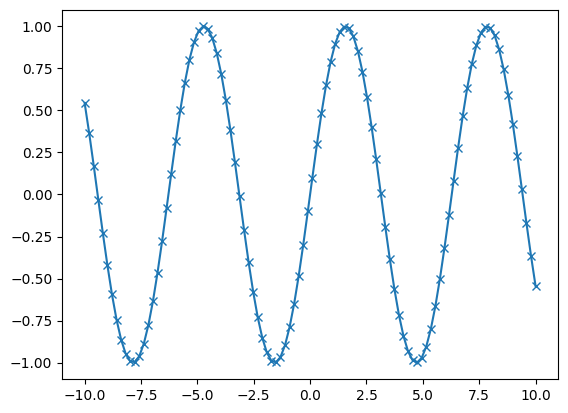

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")


In [34]:
import pandas as pd

# create a simple dataset of people.  Dictionary in python. 
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

# Transform the dictionary to a Pandas Dataframe 
data_pandas = pd.DataFrame(data)

# IPython.display allows "pretty printing" of dataframes in the Jupyter notebook
data_pandas

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [40]:
# Select all rows that have an age column greater than 30
data_pandas[data_pandas['Age']>30]

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


### mglearn

mglearn library accompanies the book. Library that must be installed previous to using.

# A First Application: Classifying Iris Species

### Data

In [47]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [62]:
# load_iris returns a bunch object.  Similar to dictionary.
# contains keys and values.  Scikit-learn object. 
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [51]:
# the value of key 'DESCR' is a short description of the dataset
print(iris_dataset['DESCR'][0:193])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre


In [52]:
# value of target names
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [53]:
# value of feature names
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [54]:
# Type of data
type(iris_dataset['data'])

numpy.ndarray

In [56]:
# Shape of the data array
iris_dataset['data'].shape

(150, 4)

In [58]:
# Print the first 5 rows of data 
iris_dataset['data'][0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [59]:
# Type of target
type(iris_dataset['target'])

numpy.ndarray

In [60]:
# Shape of the target array
iris_dataset['target'].shape

(150,)

In [61]:
# target array
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Measuring Success: Splitting into Training and Testing Data

We need to know if the model actually works. <br>
We cannot use the data we used to build to evaluate because it remembers training data. <br>
We need to split the data into a training set and a testing set.

In [63]:
from sklearn.model_selection import train_test_split

# We use the 75/25 default split and a fixed seed with random_state =0
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], 
    random_state=0)

In [64]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [65]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


### Data Visualization: First Look at Data  

Before building a model we need to inspect data. <br>
Find abnormalities or peculiarities (inconsistencies or unexpected)

In [67]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


array([[<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot: xlabel='sepal length (cm)', ylabel='p

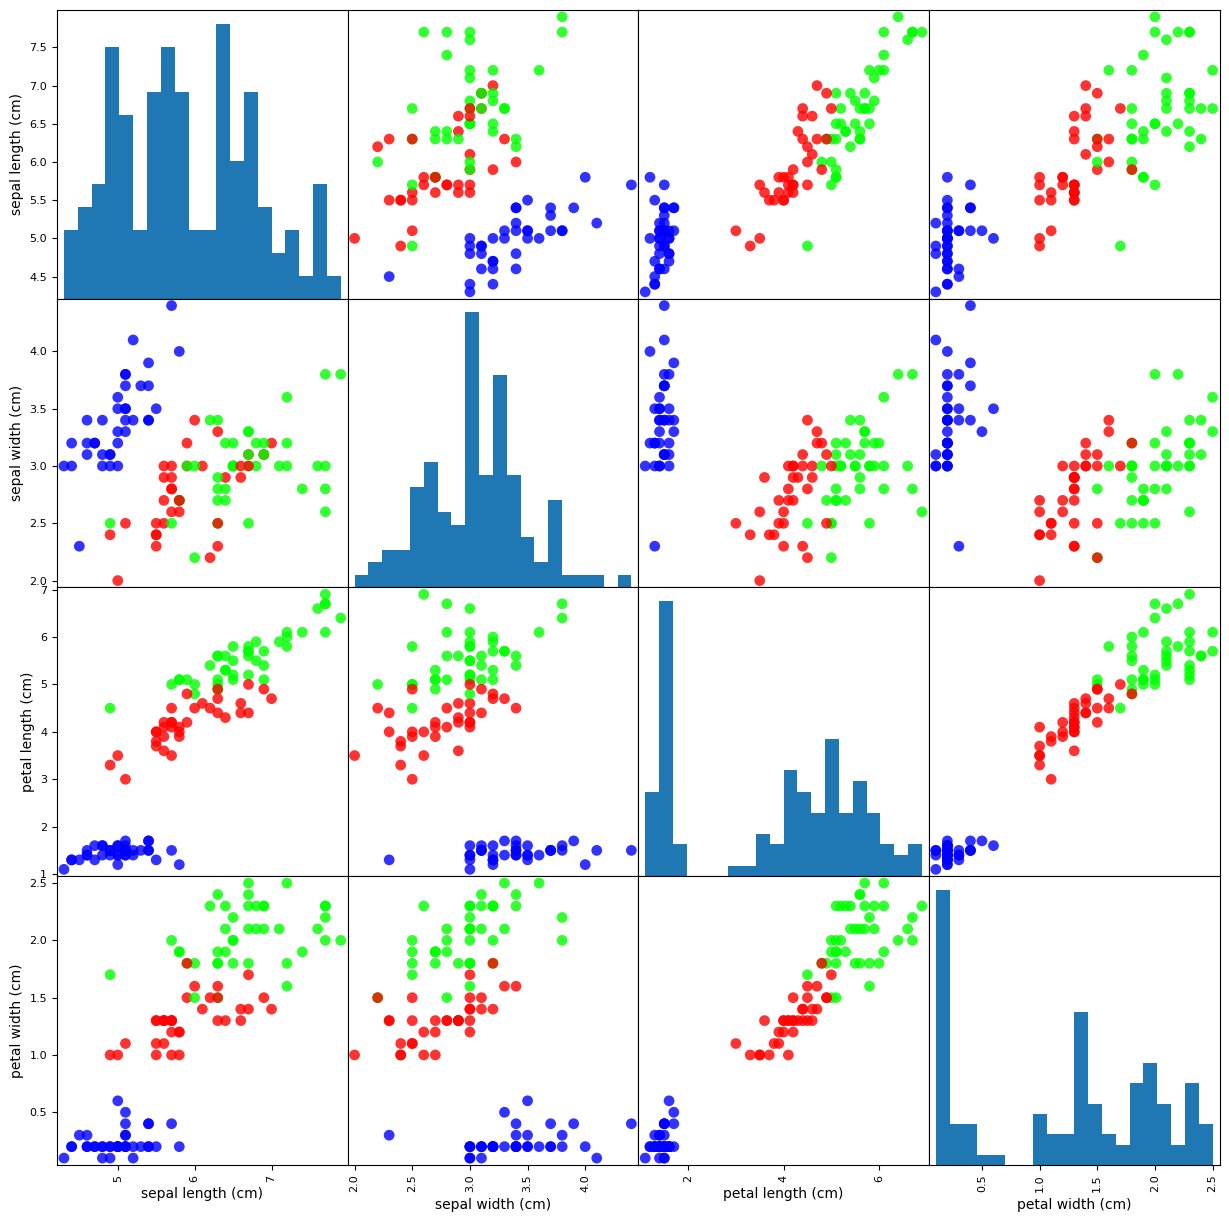

In [90]:
# hist_kwds passes bin size to histogram function
# s passes the size of points to scatter plot 
# cmap passes the color map to scatter plot

pd.plotting.scatter_matrix(iris_dataframe, c=y_train, 
                           figsize=(15, 15), marker='o', 
                           hist_kwds={'bins': 20}, alpha=.8,
                          s=60, cmap='brg')

### Building Your First Model: k-Nearest Neighbors

In [91]:
from sklearn.neighbors import KNeighborsClassifier

# k-nearest neighbors estimator 
# We need to instantiate the estimator class (KNeighbors Classifier) to an object (knn) 
knn = KNeighborsClassifier(n_neighbors=1)

In [92]:
# Build the model (train it)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Make Predictions

In [93]:
# Predict new iris with sepal length 5cm, sepal width 2.9cm, petal length 1cm and petal width 0.2cm
# Create array of new data

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [94]:
# Make prediction

prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


### Evaluate the Model

In [95]:
# Predict the test set

y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [99]:
# Get the test score 
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


We made the right prediction 97% of the time